In [608]:
import numpy   as np
import pandas  as pd
import seaborn as sea
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [609]:
data = pd.read_csv(r'datasets/DiabetesPrediction/diabetes_prediction_dataset.csv')

In [610]:
data.head(4)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0


&nbsp;
O nível de HbA1c (hemoglobina A1c) é uma medida do nível médio de açúcar no sangue de uma pessoa nos últimos 2-3 meses. Níveis mais altos

&nbsp;

# Analysis Data

In [611]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Verificando valores nulos no meu conjunto de dados

In [612]:
data.loc[ data.isna().any(axis=1) ]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


In [613]:
data.loc[ data.isna().any(axis=1) ]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


### Diabetes

In [614]:
countDiabetes = data['diabetes'].value_counts().reset_index(name='quantidade')

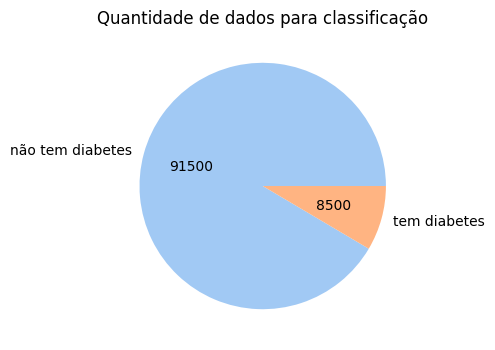

In [615]:
plt.figure(figsize=(5,4))

plt.pie( x = countDiabetes['quantidade'] , labels = ['não tem diabetes','tem diabetes'],autopct=lambda x: '{:.0f}'.format(x*countDiabetes['quantidade'].sum()/100) ,colors=sea.color_palette('pastel')[0:2])
plt.title('Quantidade de dados para classificação')
plt.show()

Os atributo `Diabetes` está desbalanceados com isso para a classificação se faz necessário o balaceamento dele. \
Como as pessoas que não tem diabetes está em mais quantidade ( muito mais) do que as que tem diabetes , irei fazer UnderSampling para o balanceamento dos dados.  

### Gender

In [616]:
data['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [617]:
data.loc[data['gender']=='Other'][['diabetes','hypertension','heart_disease','smoking_history']].value_counts().reset_index()

,diabetes,hypertension,heart_disease,smoking_history,count
0,0,0,0,not current,8
1,0,0,0,No Info,6
2,0,0,0,never,3
3,0,0,0,ever,1


In [618]:
print('Média de idade para pessoas de outro gênero :',data.loc[data['gender']=='Other']['age'].mean())

Média de idade para pessoas de outro gênero : 29.555555555555557


Esses dados para pessoa `gender` == `other` são redundantes, os valores dos atributos `hypertension` , `heart_disease` em relação `diabete` não muda continua 0, além de não mudar o valor do atributo `diabetes` continua zero. \
Com isso será removido do conjunto de dados.

In [619]:
data.drop( index = data.loc[ data['gender'] == 'Other'].index , inplace = True )

In [620]:
countGender = data['gender'].value_counts().reset_index(name='Quantidade')

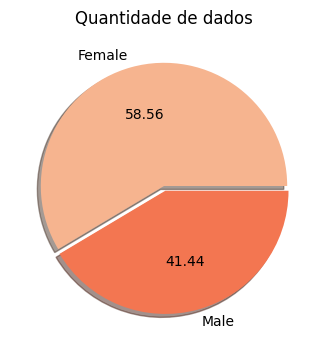

In [621]:
plt.figure(figsize=(10,4))
plt.pie( x = countGender['Quantidade'], explode=(0,0.04) , labels = countGender['gender'] ,colors = sea.color_palette('rocket_r')[0:2] , autopct='%.2f' ,shadow=True )
plt.title('Quantidade de dados')
plt.show()

Possui muito mais dados do genero feminino que o masculino. 

In [622]:
countGenderDiabetes = data.groupby( by=['gender','diabetes'] )['age'].mean().reset_index(name='Média de idade')

In [623]:
SelectDiatebes0 = data.loc[data['diabetes'] == 0][['age','gender']]
SelectDiatebes1 = data.loc[data['diabetes'] == 1][['age','gender']]

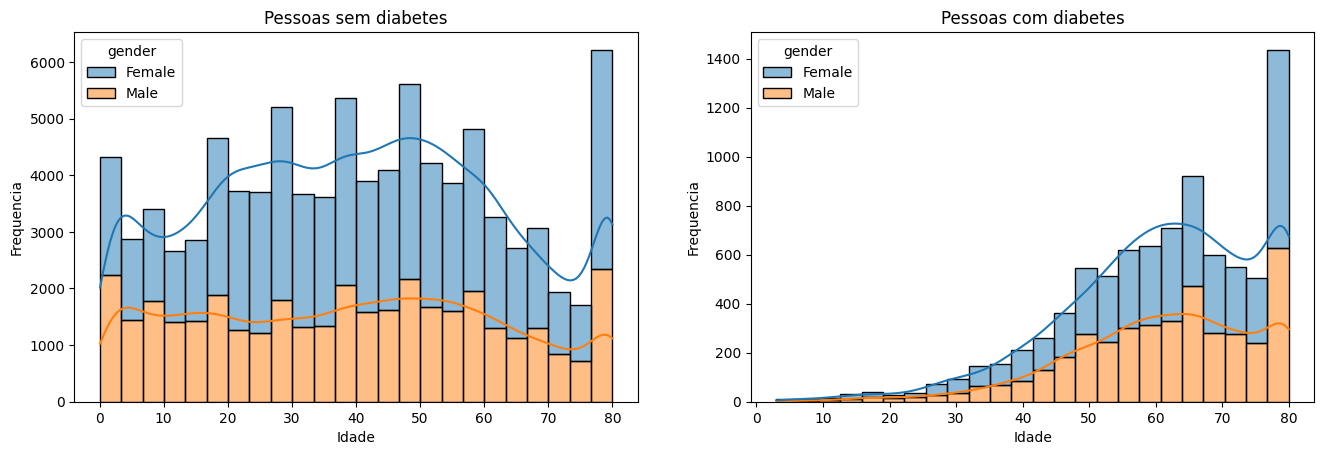

In [624]:
fig , ax = plt.subplots(1,2)
fig.set_figwidth(16)

#Sem diabetes
sea.histplot(
    x = SelectDiatebes0['age'], hue = SelectDiatebes0['gender'] , ax = ax[0] ,multiple="stack", 
    kde = True, shrink = 1 , bins = 24
)
ax[0].set_xlabel('Idade')
ax[0].set_ylabel('Frequencia')
ax[0].set_title('Pessoas sem diabetes')

# Com diabetes
sea.histplot(
    x = SelectDiatebes1['age'], hue = SelectDiatebes1['gender'], ax = ax[1] , multiple="stack", 
    kde= True, shrink=1, bins = 24
)
ax[1].set_xlabel('Idade')
ax[1].set_ylabel('Frequencia')
ax[1].set_title('Pessoas com diabetes')

plt.show()

In [625]:
groupGenHype = data.groupby( by = ['gender'])['hypertension'].value_counts().reset_index(name = 'Quantidade')

In [626]:
groupGenHype

,gender,hypertension,Quantidade
0,Female,0,54355
1,Female,1,4197
2,Male,0,38142
3,Male,1,3288


In [627]:
try:
    groupGenHype['hypertension'].loc[groupGenHype['hypertension'] == 0] = 'Não tem hipertensão'
    groupGenHype['hypertension'].loc[groupGenHype['hypertension'] == 1] = 'Tem hipertensão'
    print('ok')
except pd.errors:
    print()

ok


/tmp/ipykernel_2895/2611253973.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Não tem hipertensão' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  groupGenHype['hypertension'].loc[groupGenHype['hypertension'] == 0] = 'Não tem hipertensão'


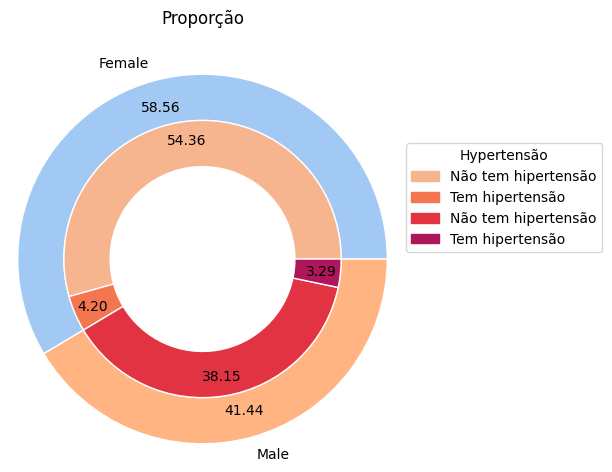

In [628]:
fig, ax = plt.subplots(figsize=(6,5))
colors1 = sea.color_palette('pastel')[0:2] 
colors2 = sea.color_palette('rocket_r')[0:4] 


ax.pie(x = groupGenHype.groupby(by=['gender'])['Quantidade'].sum(), labels= groupGenHype['gender'].drop_duplicates().values ,
       wedgeprops = dict(width=0.3, edgecolor='w'), autopct='%.2f' , pctdistance =0.85 ,colors=colors1 ,radius=1.2)

ax.pie(x = groupGenHype.groupby(by=['gender','hypertension'])['Quantidade'].sum() ,wedgeprops=dict(width=0.3, edgecolor='w'),
       radius=.9,autopct='%.2f',pctdistance=0.86 ,colors=colors2 )


legends = []
for value, color in zip(groupGenHype['hypertension'].values, colors2): 
       legends.append(mpatches.Patch(color=color, label=value))


plt.legend(title='Hypertensão',handles=legends, bbox_to_anchor=(1.01,0.519,0,0.3))
plt.title('Proporção',y=1.09)
plt.show()

> dos 41% dos homens 38% não hipertensao mas desses 38% ,3% tem diabetes. Nessa lógica para os demais atributos 

&nbsp;

&nbsp;

# Classificação

In [629]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV

In [630]:
a = data['age'].max() - data['age'].min()

In [631]:
a / 10

7.992